<a href="https://colab.research.google.com/github/mohammad2000l/Student-Performance-Analysis/blob/main/student_performance_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import os
import math
import numpy as np
import csv
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [7]:
df=pd.read_csv('/content/cleaned_data (1).csv')

In [8]:
print(df.head(6))

   StudentID  Age  Gender  Ethnicity ParentalEducation  \
0       1001   17  Female  Caucasian      Some College   
1       1002   18    Male  Caucasian       High School   
2       1003   15    Male      Asian        Bachelor's   
3       1004   17  Female  Caucasian        Bachelor's   
4       1005   17  Female  Caucasian      Some College   
5       1006   18    Male  Caucasian       High School   

   StudyTimeWeekly in minutes  StudyTimeWeekly  Absences  Tutoring  \
0                        1190        19.833723         7      True   
1                         925        15.408756         0     False   
2                         253         4.210570        26     False   
3                         602        10.028829        14     False   
4                         280         4.672495        17      True   
5                         491         8.191219         0     False   

   ParentalSupport  ...  Sports  Music  Volunteering       GPA  GradeClass  \
0                2  ... 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   StudentID                   2392 non-null   int64  
 1   Age                         2392 non-null   int64  
 2   Gender                      2392 non-null   object 
 3   Ethnicity                   2392 non-null   object 
 4   ParentalEducation           2149 non-null   object 
 5   StudyTimeWeekly in minutes  2392 non-null   int64  
 6   StudyTimeWeekly             2392 non-null   float64
 7   Absences                    2392 non-null   int64  
 8   Tutoring                    2392 non-null   bool   
 9   ParentalSupport             2392 non-null   int64  
 10  Extracurricular             2392 non-null   bool   
 11  Sports                      2392 non-null   bool   
 12  Music                       2392 non-null   bool   
 13  Volunteering                2392 

#know let us to print some important insights for the data

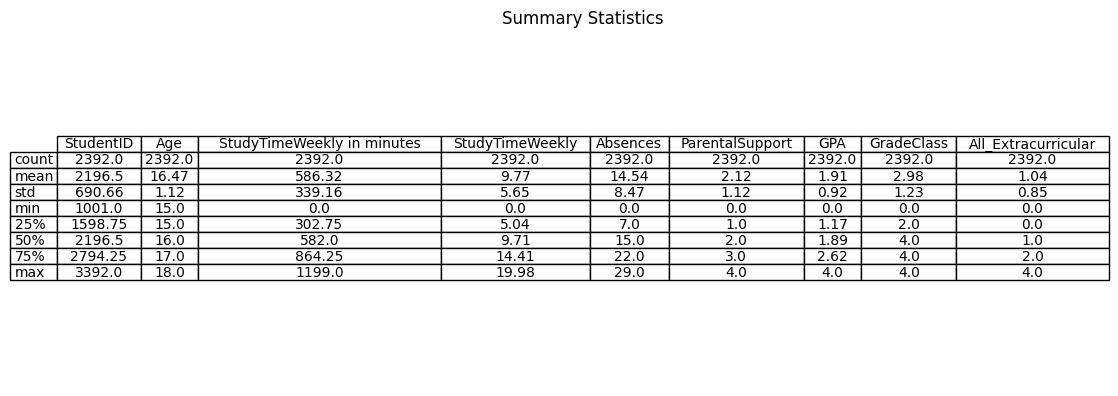

In [10]:


desc = df.describe(include=[np.number]).round(2)

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=desc.values,
    colLabels=desc.columns,
    rowLabels=desc.index,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(desc.columns))))

plt.title('Summary Statistics', fontsize=12,pad=5)
plt.subplots_adjust(top=0.85)
plt.show()

In [11]:
print(df.isnull().sum())

StudentID                       0
Age                             0
Gender                          0
Ethnicity                       0
ParentalEducation             243
StudyTimeWeekly in minutes      0
StudyTimeWeekly                 0
Absences                        0
Tutoring                        0
ParentalSupport                 0
Extracurricular                 0
Sports                          0
Music                           0
Volunteering                    0
GPA                             0
GradeClass                      0
GradeClass.1                    0
All_Extracurricular             0
Parental Support              212
study time range                0
Abcences Range                  0
dtype: int64


we have problem in (parental education) we have 243 null values and when i test my data i found the null value meaning none lrt us fix that


In [12]:
df = df.fillna('None')

In [13]:
print(df.isnull().sum())

StudentID                     0
Age                           0
Gender                        0
Ethnicity                     0
ParentalEducation             0
StudyTimeWeekly in minutes    0
StudyTimeWeekly               0
Absences                      0
Tutoring                      0
ParentalSupport               0
Extracurricular               0
Sports                        0
Music                         0
Volunteering                  0
GPA                           0
GradeClass                    0
GradeClass.1                  0
All_Extracurricular           0
Parental Support              0
study time range              0
Abcences Range                0
dtype: int64


In [14]:
#the data is clean now

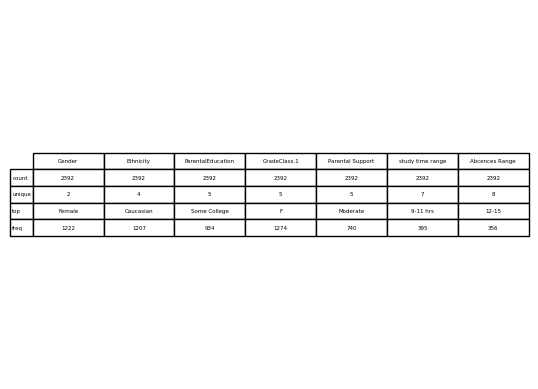

In [15]:
opj=df.describe(include = "object")
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=opj.values,
    colLabels=opj.columns,
    rowLabels=opj.index,
    cellLoc='center',
    loc='center'
)

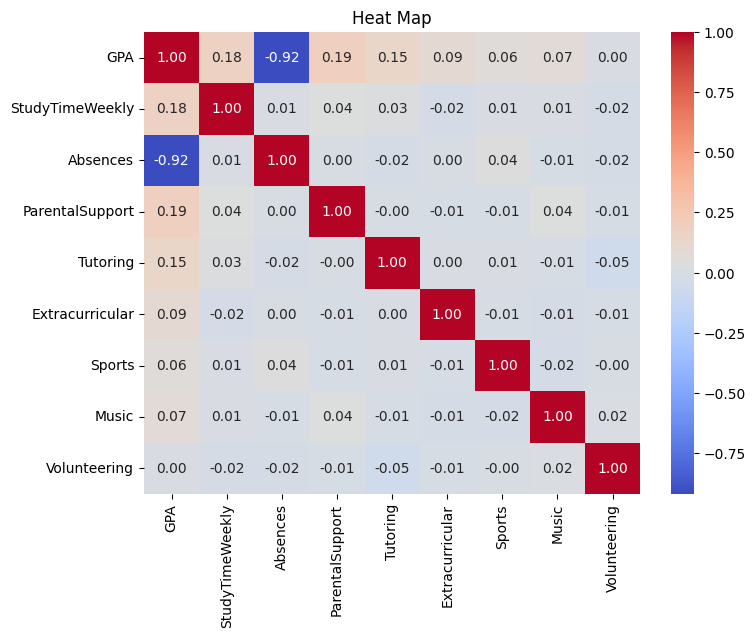

In [16]:
corr = df[['GPA','StudyTimeWeekly','Absences','ParentalSupport','Tutoring','Extracurricular','Sports','Music','Volunteering']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Heat Map')
plt.show()

In [17]:
df['All_Extracurricular'] = df[['Extracurricular', 'Sports', 'Music', 'Volunteering']].astype(int).sum(axis=1)

In [18]:
from sklearn.linear_model import LinearRegression


X = df[['StudyTimeWeekly', 'Absences']]
y = df['GPA']


model = LinearRegression()

model.fit(X, y)


print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

from sklearn.feature_selection import f_regression


f_stat, p_values = f_regression(X, y)

print("p-values:", p_values)

Intercept: 3.056550674281287
Coefficients: [ 0.03041433 -0.09954847]
p-values: [1.00020113e-18 0.00000000e+00]


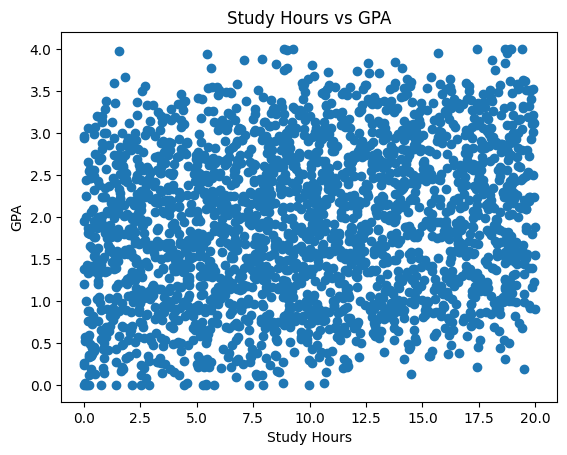

In [19]:


# رسم العلاقة بين ساعات الدراسة و GPA
plt.scatter(df['StudyTimeWeekly'], df['GPA'])
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.title('Study Hours vs GPA')
plt.show()

          Absences       GPA
Absences  1.000000 -0.919314
GPA      -0.919314  1.000000


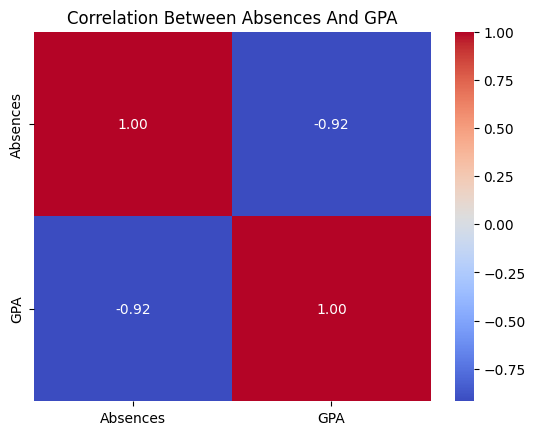

In [20]:
abcence_corr=df[['Absences','GPA']].corr()
print(abcence_corr)
sns.heatmap(abcence_corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Between Absences And GPA')
plt.show()

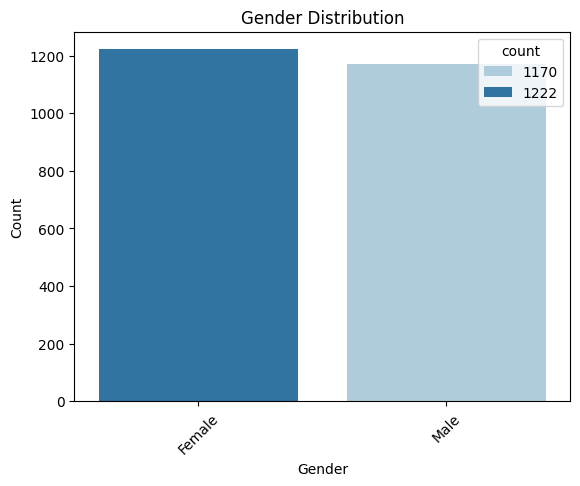

In [21]:
gender_count = df["Gender"].value_counts()
sns.barplot(x=gender_count.index, y=gender_count.values,hue=gender_count,palette='Paired')
plt.xticks(rotation=45)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()


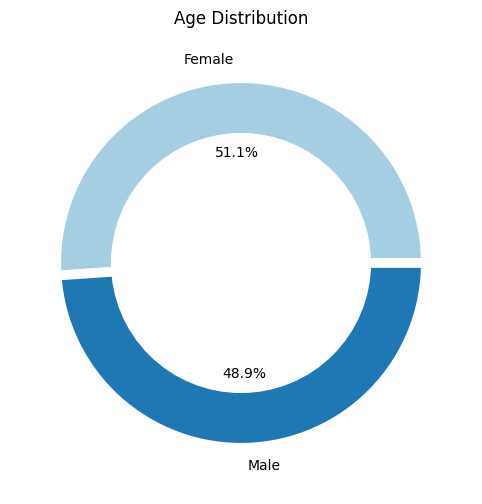

In [22]:
colors=sns.color_palette('Paired')
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%',colors=colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title('Age Distribution')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

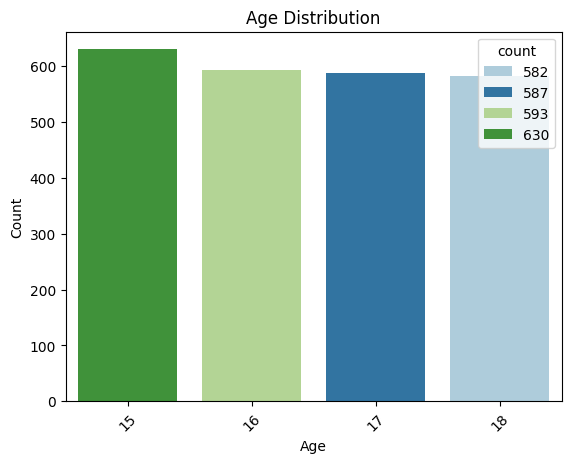

In [23]:
age_count = df["Age"].value_counts()
sns.barplot(x=age_count.index, y=age_count.values,hue=age_count,palette='Paired')
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

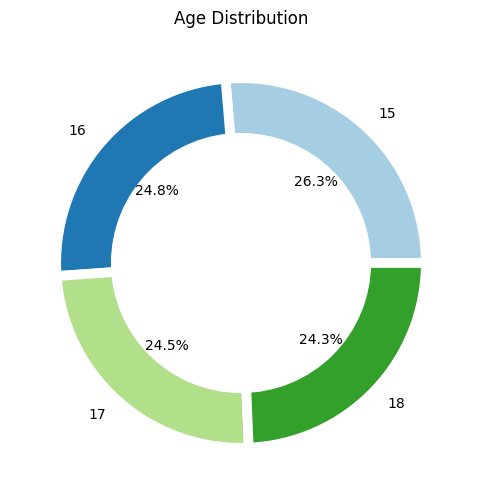

In [24]:
colors=sns.color_palette('Paired')
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(8, 6))
plt.pie(age_count, labels=age_count.index, autopct='%1.1f%%',colors=colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title('Age Distribution')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

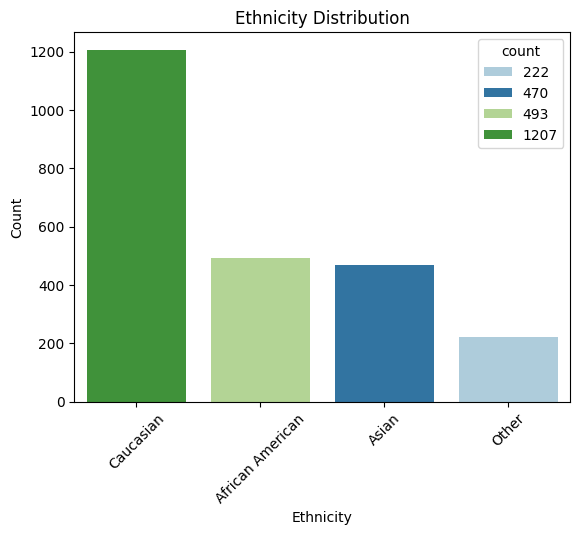

In [25]:
Ethnicity_count = df["Ethnicity"].value_counts()
sns.barplot(x=Ethnicity_count.index, y=Ethnicity_count.values,hue=Ethnicity_count,palette='Paired')
plt.xticks(rotation=45)
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.title("Ethnicity Distribution")
plt.show()

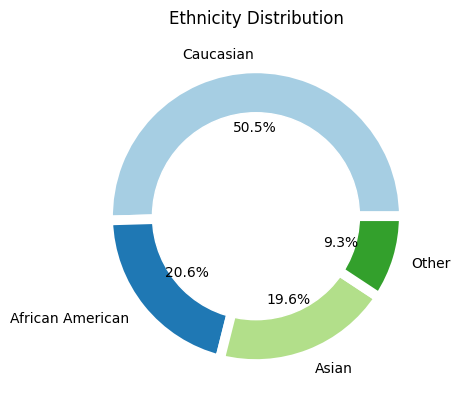

In [26]:
my_circle=plt.Circle((0,0),0.7,color='white')
plt.pie(Ethnicity_count, labels=Ethnicity_count.index, autopct='%1.1f%%',colors=colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title('Ethnicity Distribution')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

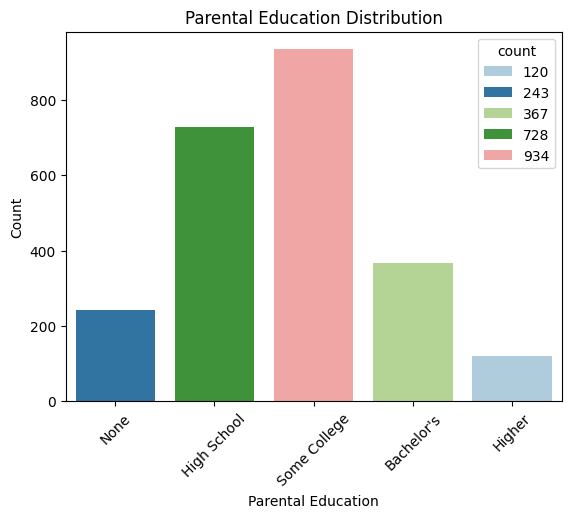

In [27]:
ordered=['None','High School','Some College',"Bachelor's",'Higher']
parental_education_count = df["ParentalEducation"].value_counts()
parental_education_count=parental_education_count[ordered]
sns.barplot(x=parental_education_count.index, y=parental_education_count.values,hue=parental_education_count,palette='Paired')
plt.xticks(rotation=45)
plt.xlabel("Parental Education")
plt.ylabel("Count")
plt.title("Parental Education Distribution")
plt.show()

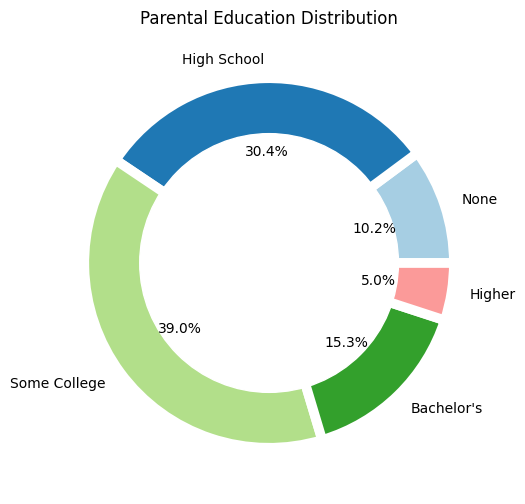

In [28]:
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(8, 6))
plt.pie(parental_education_count, labels=parental_education_count.index, autopct='%1.1f%%',colors=colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title('Parental Education Distribution')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [29]:
support_mapping = {
    0: "None",
    1: "Low",
    2: "Moderate",
    3: "High",
    4: "Very High"
}
df['Parental Support'] = df['ParentalSupport'].map(support_mapping)

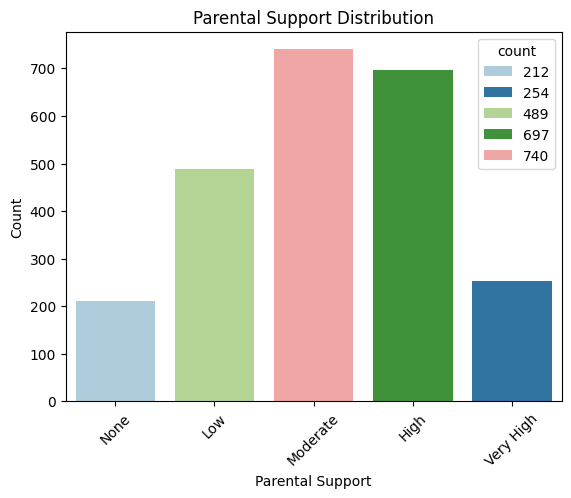

In [30]:
paretnal_support_order = ['None', 'Low', 'Moderate', 'High', 'Very High']
df['Parental Support'] = pd.Categorical(df['Parental Support'], categories=paretnal_support_order, ordered=True)
parental_support_count = df["Parental Support"].value_counts()
sns.barplot(x=parental_support_count.index, y=parental_support_count.values,hue=parental_support_count,palette='Paired')
plt.xticks(rotation=45)
plt.xlabel("Parental Support")
plt.ylabel("Count")
plt.title("Parental Support Distribution")
plt.show()

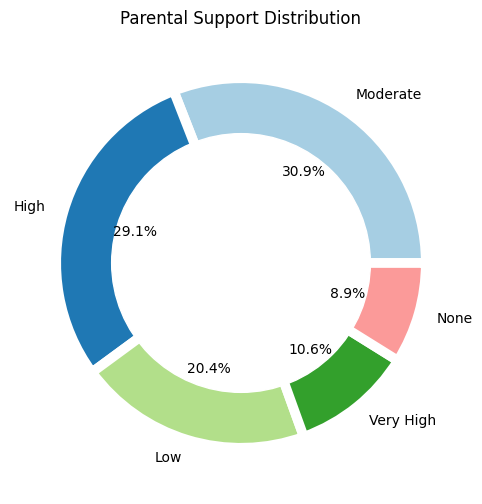

In [31]:
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(8, 6))
plt.pie(parental_support_count, labels=parental_support_count.index, autopct='%1.1f%%',colors=colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title('Parental Support Distribution')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

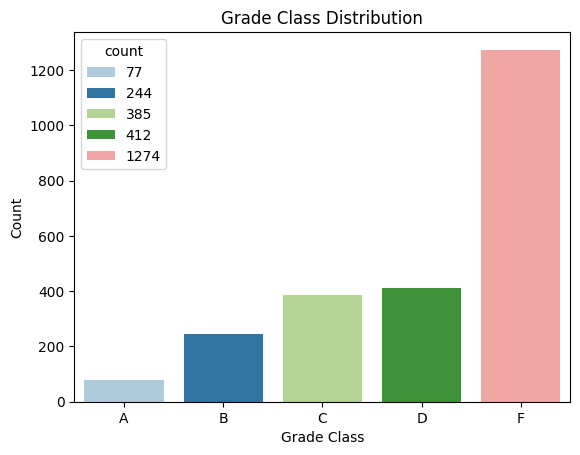

In [32]:
grade_order=['A','B','C','D','F']
grade_class_count=df["GradeClass.1"].value_counts()
grade_class_count=grade_class_count[grade_order]
sns.barplot(x=grade_class_count.index, y=grade_class_count.values,hue=grade_class_count,palette='Paired')
plt.xlabel("Grade Class")
plt.ylabel("Count")
plt.title("Grade Class Distribution")
plt.show()

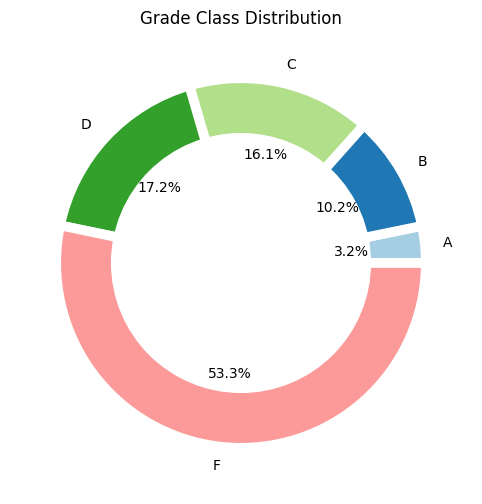

In [33]:
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(8, 6))
plt.pie(grade_class_count, labels=grade_class_count.index, autopct='%1.1f%%',colors=colors,wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title('Grade Class Distribution')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

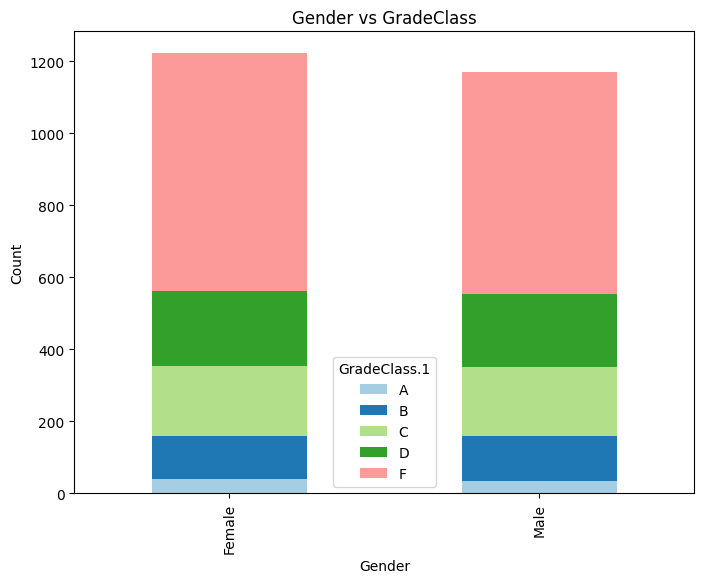

In [34]:
pd.crosstab(df['Gender'], df['GradeClass.1']).plot(kind='bar', stacked=True,figsize=(8, 6),color=colors)
plt.title('Gender vs GradeClass')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [35]:
df.describe(include = "bool")

,Tutoring,Extracurricular,Sports,Music,Volunteering
count,2392,2392,2392,2392,2392
unique,2,2,2,2,2
top,False,False,False,False,False
freq,1671,1475,1666,1921,2016


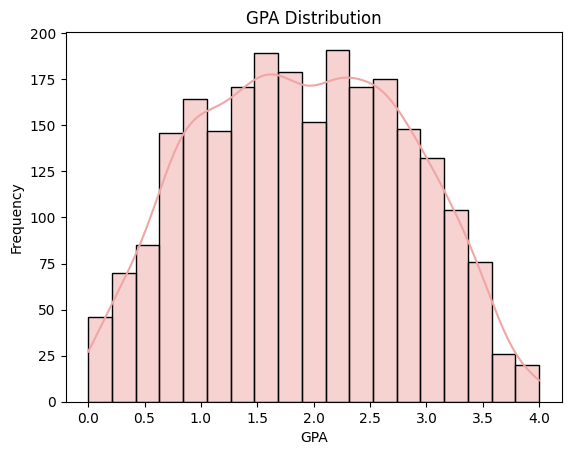

In [36]:

sns.histplot(df['GPA'],kde=True,color='#EFA6A5')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('GPA Distribution')
plt.show()

1.919022574121212


Text(0.5, 1.0, 'GPA Distribution')

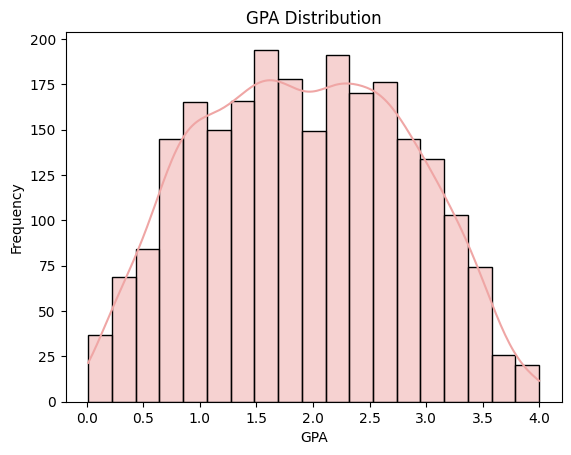

In [37]:
clean_avg=df['GPA']
clean_avg=clean_avg[clean_avg>0]
avg_clean=clean_avg.mean()
print(avg_clean)
sns.histplot(clean_avg,kde=True,color='#EFA6A5')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('GPA Distribution')

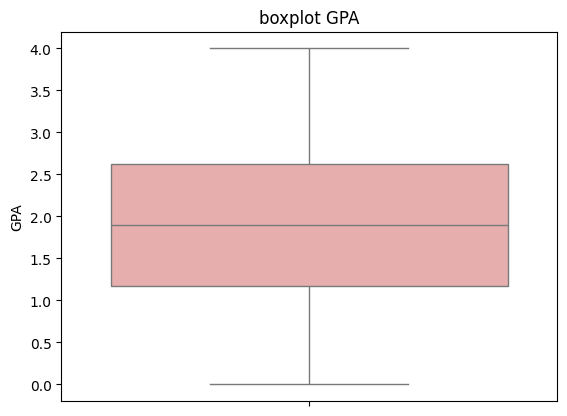

In [38]:
sns.boxplot(data=df['GPA'],color='#EFA6A5')
plt.ylabel('GPA')
plt.title('boxplot GPA')
plt.show()

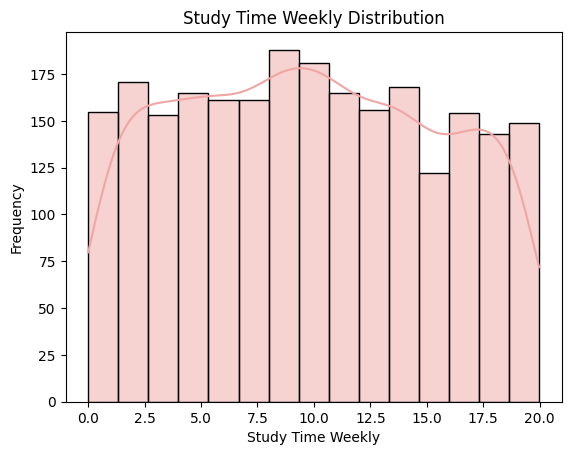

In [39]:
sns.histplot(df['StudyTimeWeekly'],color='#EFA6A5',kde=True)
plt.xlabel('Study Time Weekly')
plt.ylabel('Frequency')
plt.title('Study Time Weekly Distribution')
plt.show()

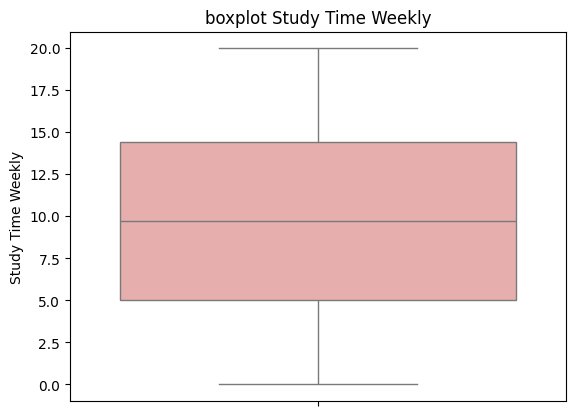

In [40]:
sns.boxplot(data=df['StudyTimeWeekly'],color='#EFA6A5')
plt.ylabel('Study Time Weekly')
plt.title('boxplot Study Time Weekly')
plt.show()

/tmp/ipython-input-41-2568510041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x='Gender', y='GPA', data=avg_gpa_by_gender,palette='Paired')


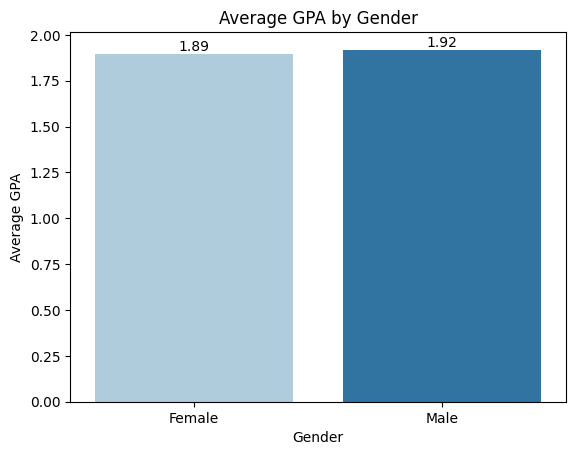

In [41]:
avg_gpa_by_gender=df.groupby('Gender')['GPA'].mean().reset_index()
barplot=sns.barplot(x='Gender', y='GPA', data=avg_gpa_by_gender,palette='Paired')
for p in barplot.containers:
    barplot.bar_label(p, label_type='edge',fmt='%.2f')
plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.title('Average GPA by Gender')
plt.show()

/tmp/ipython-input-42-505957618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x='Ethnicity', y='GPA', data=avg_gpa_by_ethnicity,palette="Paired")


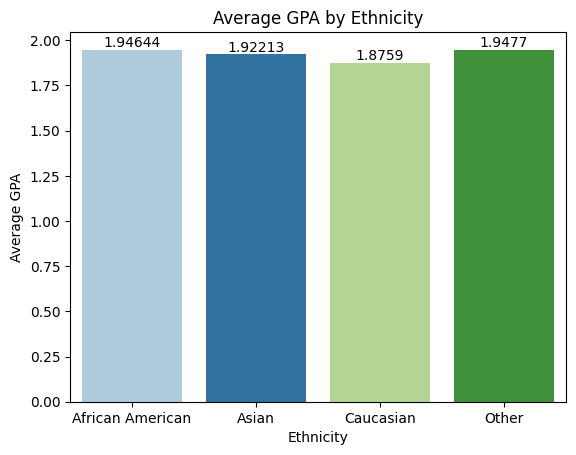

In [42]:
avg_gpa_by_ethnicity=df.groupby('Ethnicity')['GPA'].mean().reset_index()
barplot=sns.barplot(x='Ethnicity', y='GPA', data=avg_gpa_by_ethnicity,palette="Paired")
for p in barplot.containers:
    barplot.bar_label(p, label_type='edge')
plt.xlabel('Ethnicity')
plt.ylabel('Average GPA')
plt.title('Average GPA by Ethnicity')
plt.show()

/tmp/ipython-input-43-3320977896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x='ParentalEducation', y='GPA', data=avg_gpa_by_parental_education,palette="Paired")


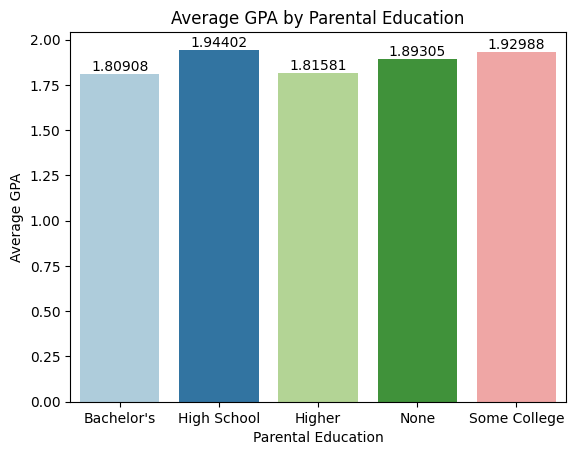

In [43]:
avg_gpa_by_parental_education=df.groupby('ParentalEducation')['GPA'].mean().reset_index()
barplot=sns.barplot(x='ParentalEducation', y='GPA', data=avg_gpa_by_parental_education,palette="Paired")
for p in barplot.containers:
    barplot.bar_label(p, label_type='edge')
plt.xlabel('Parental Education')
plt.ylabel('Average GPA')
plt.title('Average GPA by Parental Education')
plt.show()

/tmp/ipython-input-44-151559089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gpa_by_parental_support=df.groupby('Parental Support')['GPA'].mean().reset_index()
/tmp/ipython-input-44-151559089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x='Parental Support', y='GPA', data=avg_gpa_by_parental_support,palette="Paired")


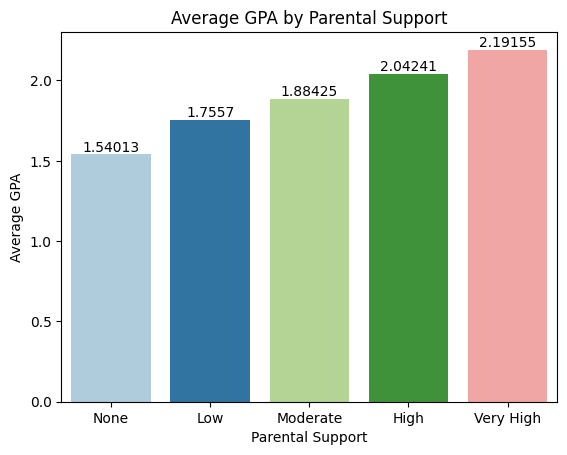

In [44]:
avg_gpa_by_parental_support=df.groupby('Parental Support')['GPA'].mean().reset_index()
barplot=sns.barplot(x='Parental Support', y='GPA', data=avg_gpa_by_parental_support,palette="Paired")
for p in barplot.containers:
    barplot.bar_label(p, label_type='edge')
plt.xlabel('Parental Support')
plt.ylabel('Average GPA')
plt.title('Average GPA by Parental Support')
plt.show()

/tmp/ipython-input-45-2749214083.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gpa_by_study_time = df.groupby('study time range')['GPA'].mean().reset_index()
/tmp/ipython-input-45-2749214083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x='study time range', y='GPA', data=avg_gpa_by_study_time,palette="Paired")


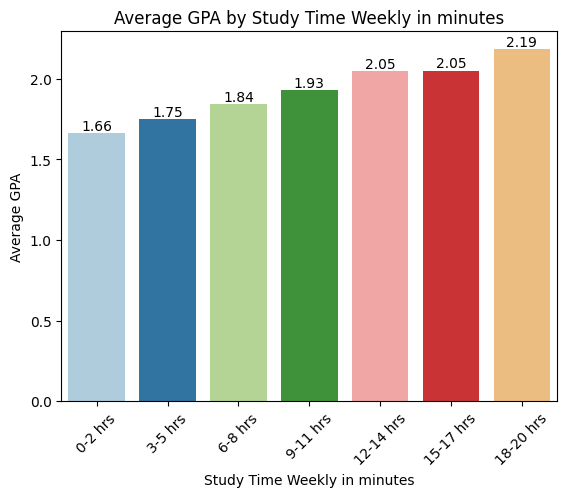

In [45]:
bins = [0, 180, 360, 540, 720, 900, 1080, 1260]
labels = ['0-2 hrs', '3-5 hrs', '6-8 hrs', '9-11 hrs', '12-14 hrs', '15-17 hrs','18-20 hrs']
df['study time range'] = pd.cut(df['StudyTimeWeekly in minutes'], bins=bins, labels=labels, right=False)
avg_gpa_by_study_time = df.groupby('study time range')['GPA'].mean().reset_index()
barplot=sns.barplot(x='study time range', y='GPA', data=avg_gpa_by_study_time,palette="Paired")
for p in barplot.containers:
    barplot.bar_label(p, fmt='%.2f',label_type='edge')
plt.xlabel('Study Time Weekly in minutes')
plt.xticks(rotation=45)
plt.ylabel('Average GPA')
plt.title('Average GPA by Study Time Weekly in minutes')

plt.show()

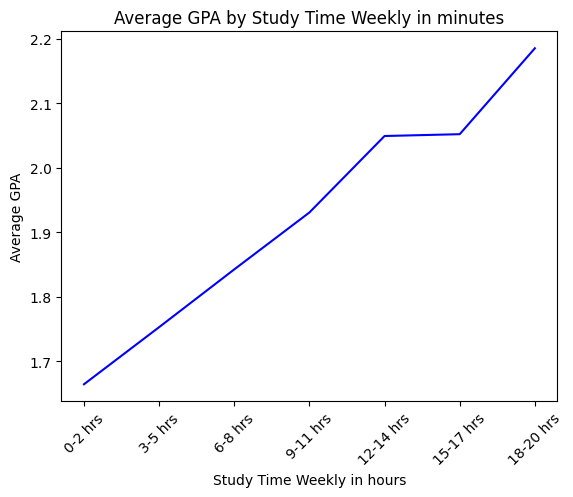

In [46]:
sns.lineplot(x='study time range', y='GPA', data=avg_gpa_by_study_time,color='blue')
plt.xlabel('Study Time Weekly in hours')
plt.xticks(rotation=45)
plt.ylabel('Average GPA')
plt.title('Average GPA by Study Time Weekly in minutes')
plt.show()

/tmp/ipython-input-47-2028070553.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gpa_by_abcences=df.groupby('Abcences Range')['GPA'].mean().reset_index()
/tmp/ipython-input-47-2028070553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Abcencesbarplot=sns.barplot(x='Abcences Range', y='GPA', data=avg_gpa_by_abcences,palette="Paired")


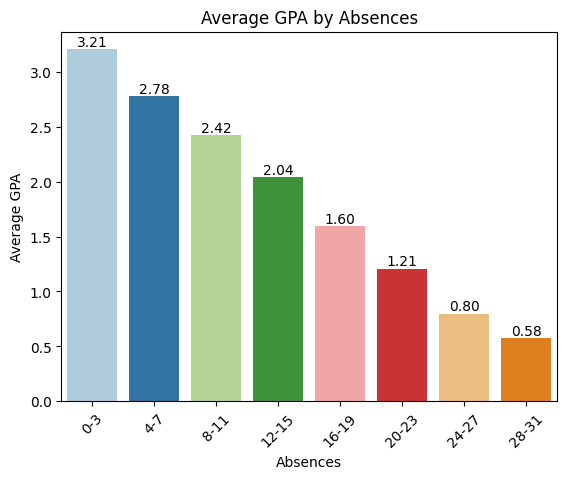

In [47]:
binsOfAbcences=[0,4,8,12,16,20,24,28,32]
labelsOfAbcences=['0-3','4-7','8-11','12-15','16-19','20-23','24-27','28-31']
df['Abcences Range']=pd.cut(df['Absences'],bins=binsOfAbcences,labels=labelsOfAbcences,right=False)
avg_gpa_by_abcences=df.groupby('Abcences Range')['GPA'].mean().reset_index()
Abcencesbarplot=sns.barplot(x='Abcences Range', y='GPA', data=avg_gpa_by_abcences,palette="Paired")
for p in Abcencesbarplot.containers:
    Abcencesbarplot.bar_label(p, fmt='%.2f',label_type='edge')

plt.xlabel('Absences')
plt.xticks(rotation=45)
plt.ylabel('Average GPA')
plt.title('Average GPA by Absences')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   StudentID                   2392 non-null   int64   
 1   Age                         2392 non-null   int64   
 2   Gender                      2392 non-null   object  
 3   Ethnicity                   2392 non-null   object  
 4   ParentalEducation           2392 non-null   object  
 5   StudyTimeWeekly in minutes  2392 non-null   int64   
 6   StudyTimeWeekly             2392 non-null   float64 
 7   Absences                    2392 non-null   int64   
 8   Tutoring                    2392 non-null   bool    
 9   ParentalSupport             2392 non-null   int64   
 10  Extracurricular             2392 non-null   bool    
 11  Sports                      2392 non-null   bool    
 12  Music                       2392 non-null   bool    
 13  Volunteering      

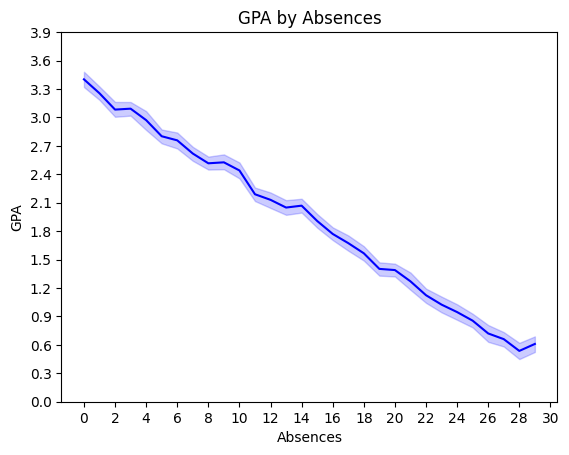

In [49]:
sns.lineplot(x='Absences', y='GPA', data=df,color='blue')
plt.xticks(np.arange(min(df['Absences']), max(df['Absences'])+2, 2))
plt.xlabel('Absences')
plt.yticks(np.arange(min(df['GPA']), max(df['GPA']), 0.3))
plt.ylabel('GPA')

plt.title('GPA by Absences')

plt.show()

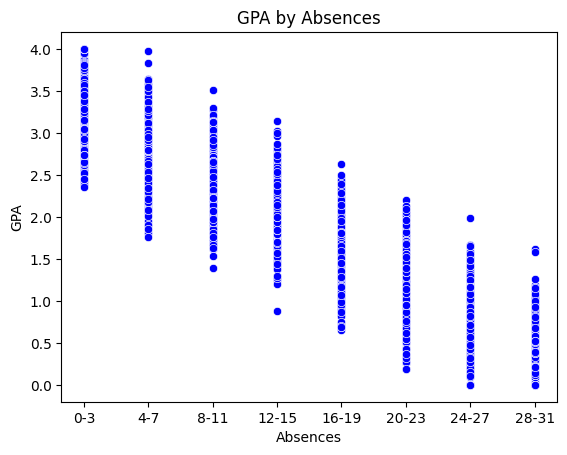

In [50]:
sns.scatterplot(x='Abcences Range', y='GPA', data=df,color='blue')
plt.xlabel('Absences')
plt.ylabel('GPA')
plt.title('GPA by Absences')
plt.show()

/tmp/ipython-input-51-3846842493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bartut=sns.barplot(x='Tutoring', y='GPA', data=Tutoring_by_avg_gpa,palette={"#40923A","#CA3335"})


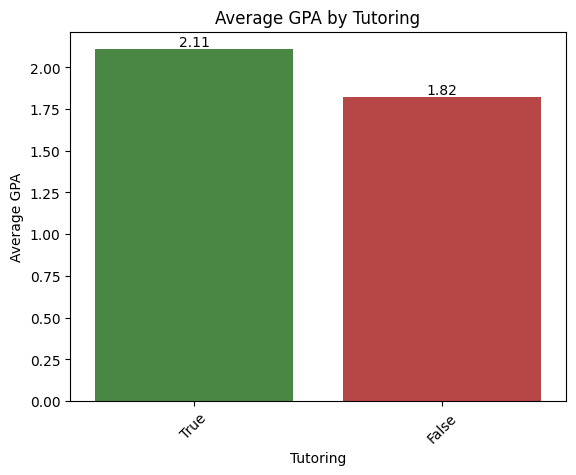

In [51]:
the_order=[True,False]
Tutoring_by_avg_gpa=df.groupby('Tutoring')['GPA'].mean().reset_index()
Tutoring_by_avg_gpa['Tutoring']=pd.Categorical(Tutoring_by_avg_gpa['Tutoring'],categories=the_order,ordered=True)
bartut=sns.barplot(x='Tutoring', y='GPA', data=Tutoring_by_avg_gpa,palette={"#40923A","#CA3335"})
for p in bartut.containers:
    bartut.bar_label(p,fmt='%.2f', label_type='edge')
plt.xlabel('Tutoring')
plt.ylabel('Average GPA')
plt.title('Average GPA by Tutoring')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-52-4027797153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bartut=sns.barplot(x='Tutoring', y='StudyTimeWeekly', data=Tutoring_by_study_time,palette={"#40923A","#CA3335"})


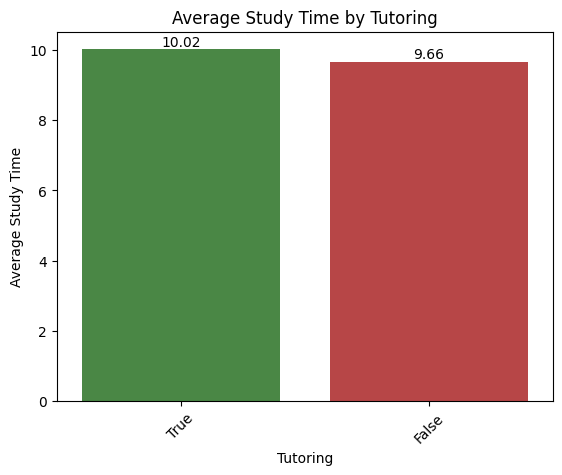

In [52]:
the_order=[True,False]
Tutoring_by_study_time=df.groupby('Tutoring')['StudyTimeWeekly'].mean().reset_index()
Tutoring_by_study_time['Tutoring']=pd.Categorical(Tutoring_by_study_time['Tutoring'],categories=the_order,ordered=True)
bartut=sns.barplot(x='Tutoring', y='StudyTimeWeekly', data=Tutoring_by_study_time,palette={"#40923A","#CA3335"})
for p in bartut.containers:
    bartut.bar_label(p,fmt='%.2f', label_type='edge')
plt.xlabel('Tutoring')
plt.ylabel('Average Study Time')
plt.title('Average Study Time by Tutoring')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-53-2062005624.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Tutoring', y='StudyTimeWeekly', data=df, palette='Paired', jitter=True)


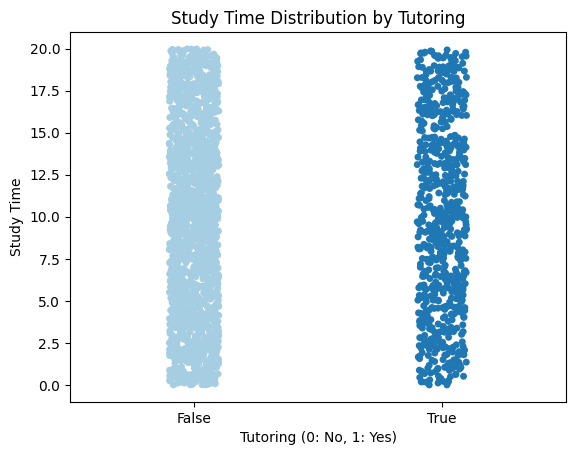

In [53]:
sns.stripplot(x='Tutoring', y='StudyTimeWeekly', data=df, palette='Paired', jitter=True)
plt.title('Study Time Distribution by Tutoring')
plt.xlabel('Tutoring (0: No, 1: Yes)')
plt.ylabel('Study Time')
plt.show()

/tmp/ipython-input-54-4047741468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_extrac=sns.barplot(x='Extracurricular', y='GPA', data=Extracurricular_by_avg_gpa,palette={"#40923A","#CA3335"})


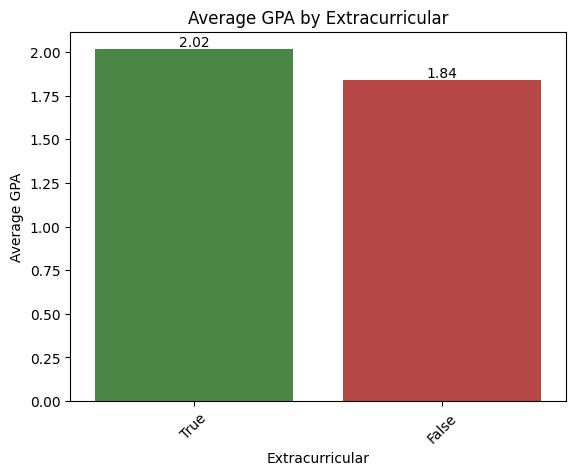

In [54]:
Extracurricular_by_avg_gpa=df.groupby('Extracurricular')['GPA'].mean().reset_index()
Extracurricular_by_avg_gpa['Extracurricular']=pd.Categorical(Extracurricular_by_avg_gpa['Extracurricular'],categories=the_order,ordered=True)
bar_extrac=sns.barplot(x='Extracurricular', y='GPA', data=Extracurricular_by_avg_gpa,palette={"#40923A","#CA3335"})
for p in bar_extrac.containers:
    bar_extrac.bar_label(p,fmt='%.2f', label_type='edge')
plt.xlabel('Extracurricular')
plt.xticks(rotation=45)
plt.ylabel('Average GPA')
plt.title('Average GPA by Extracurricular')
plt.show()

/tmp/ipython-input-55-966540778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_sports=sns.barplot(x='Sports', y='GPA', data=Sports_by_avg_gpa,palette={"#40923A","#CA3335"})


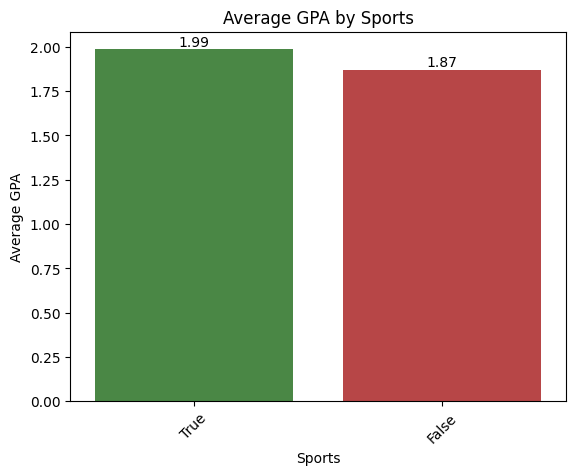

In [55]:
Sports_by_avg_gpa=df.groupby('Sports')['GPA'].mean().reset_index()
Sports_by_avg_gpa['Sports']=pd.Categorical(Sports_by_avg_gpa['Sports'],categories=the_order,ordered=True)
bar_sports=sns.barplot(x='Sports', y='GPA', data=Sports_by_avg_gpa,palette={"#40923A","#CA3335"})
for p in bar_sports.containers:
    bar_sports.bar_label(p,fmt='%.2f', label_type='edge')

plt.xlabel('Sports')
plt.xticks(rotation=45)
plt.ylabel('Average GPA')
plt.title('Average GPA by Sports')
plt.show()

/tmp/ipython-input-56-2664827583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_music=sns.barplot(x='Music', y='GPA', data=Music_by_avg_gpa,palette={"#40923A","#CA3335"})


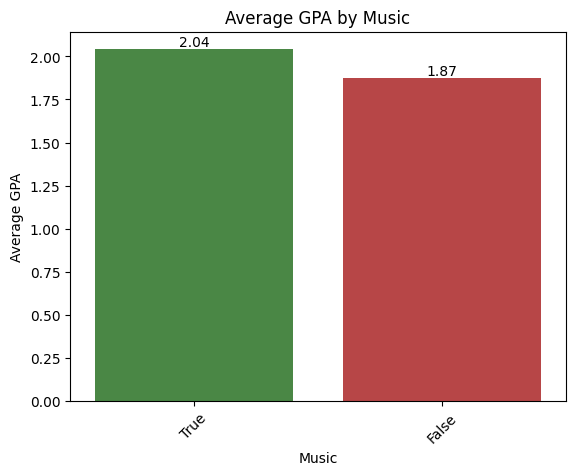

In [56]:
Music_by_avg_gpa=df.groupby('Music')['GPA'].mean().reset_index()
Music_by_avg_gpa['Music']=pd.Categorical(Music_by_avg_gpa['Music'],categories=the_order,ordered=True)
bar_music=sns.barplot(x='Music', y='GPA', data=Music_by_avg_gpa,palette={"#40923A","#CA3335"})
for p in bar_music.containers:
    bar_music.bar_label(p,fmt='%.2f', label_type='edge')
plt.xlabel('Music')
plt.xticks(rotation=45)
plt.ylabel('Average GPA')
plt.title('Average GPA by Music')
plt.show()

/tmp/ipython-input-57-567075540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_volunteering=sns.barplot(x='Volunteering', y='GPA', data=Volunteering_by_avg_gpa,palette={"#40923A","#CA3335"})


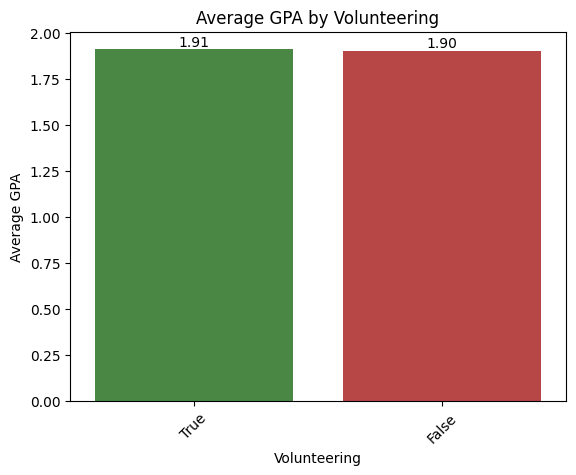

In [57]:
Volunteering_by_avg_gpa=df.groupby('Volunteering')['GPA'].mean().reset_index()
Volunteering_by_avg_gpa['Volunteering']=pd.Categorical(Volunteering_by_avg_gpa['Volunteering'],categories=the_order,ordered=True)
bar_volunteering=sns.barplot(x='Volunteering', y='GPA', data=Volunteering_by_avg_gpa,palette={"#40923A","#CA3335"})
for p in bar_volunteering.containers:
    bar_volunteering.bar_label(p,fmt='%.2f', label_type='edge')
plt.xlabel('Volunteering')
plt.xticks(rotation=45)
plt.ylabel('Average GPA')
plt.title('Average GPA by Volunteering')
plt.show()

/tmp/ipython-input-58-800159198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_All_Extracurricular=sns.barplot(x='All_Extracurricular', y='GPA', data=All_Extracurricular_by_avg_gpa,palette="Paired")


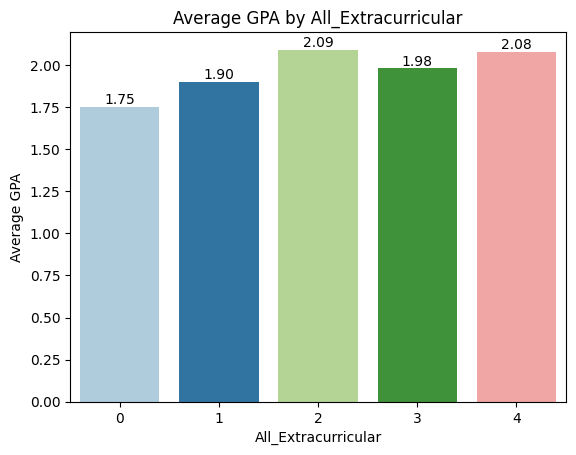

In [58]:
All_Extracurricular_by_avg_gpa=df.groupby('All_Extracurricular')['GPA'].mean().reset_index()
bar_All_Extracurricular=sns.barplot(x='All_Extracurricular', y='GPA', data=All_Extracurricular_by_avg_gpa,palette="Paired")
for p in bar_All_Extracurricular.containers:
    bar_All_Extracurricular.bar_label(p,fmt='%.2f', label_type='edge')
plt.xlabel('All_Extracurricular')

plt.ylabel('Average GPA')
plt.title('Average GPA by All_Extracurricular')
plt.show()

## if we except the gpa=0

/tmp/ipython-input-59-1510222895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_All_Extracurricular = sns.barplot(x='All_Extracurricular', y='GPA', data=All_Extracurricular_by_avg_gpa, palette="Paired")


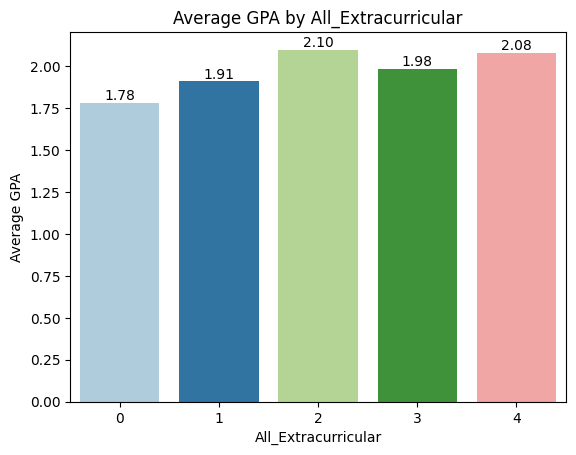

In [59]:
filtered_data = df.query('GPA > 0')
All_Extracurricular_by_avg_gpa = filtered_data.groupby('All_Extracurricular')['GPA'].mean().reset_index()

bar_All_Extracurricular = sns.barplot(x='All_Extracurricular', y='GPA', data=All_Extracurricular_by_avg_gpa, palette="Paired")
for p in bar_All_Extracurricular.containers:
    bar_All_Extracurricular.bar_label(p, fmt='%.2f', label_type='edge')

plt.xlabel('All_Extracurricular')

plt.ylabel('Average GPA')
plt.title('Average GPA by All_Extracurricular')
plt.show()

/tmp/ipython-input-60-2011086834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Tutoring', y='GPA', data=df, palette='Paired', jitter=True)


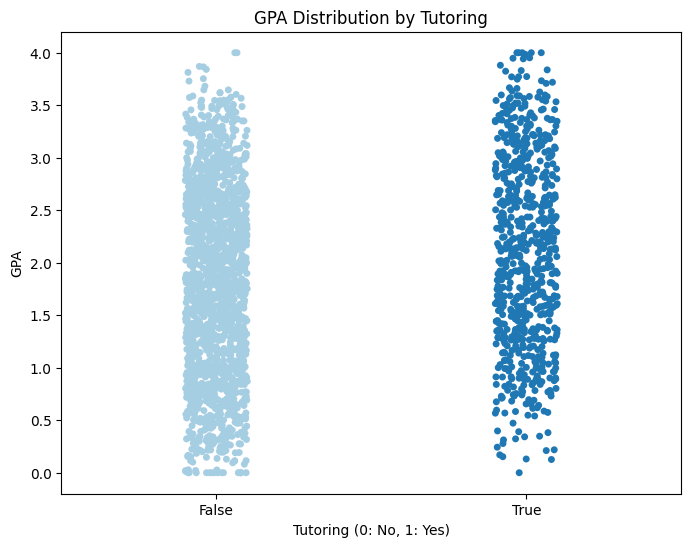

In [60]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='Tutoring', y='GPA', data=df, palette='Paired', jitter=True)
plt.title('GPA Distribution by Tutoring')
plt.xlabel('Tutoring (0: No, 1: Yes)')
plt.ylabel('GPA')
plt.show()


In [61]:

from scipy.stats import kstest, uniform
min_val = df['StudyTimeWeekly'].min()
max_val = df['StudyTimeWeekly'].max()


ks_statistic, p_value = kstest(df['StudyTimeWeekly'], 'uniform', args=(min_val, max_val - min_val))

print(f"Kolmogorov-Smirnov Test: Statistic = {ks_statistic}, p-value = {p_value}")

if p_value > 0.05:
    print("The data follows a uniform distribution.")
else:
    print("The data does NOT follow a uniform distribution.")

mean = df['StudyTimeWeekly'].mean()
variance = df['StudyTimeWeekly'].var()

print(f"Mean: {mean}, Variance: {variance}")

Kolmogorov-Smirnov Test: Statistic = 0.030485202628617092, p-value = 0.022967261233710172
The data does NOT follow a uniform distribution.
Mean: 9.771991919460703, Variance: 31.95385656191996


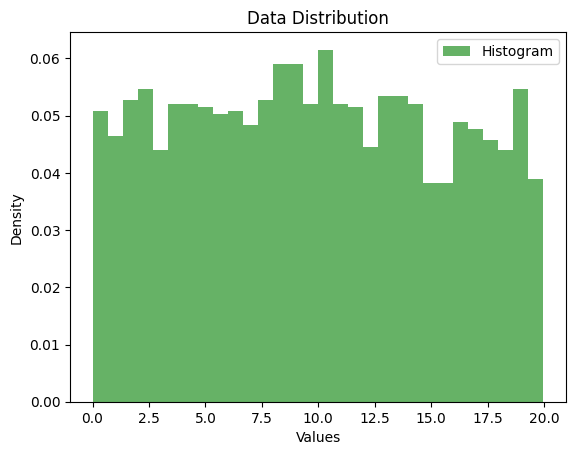

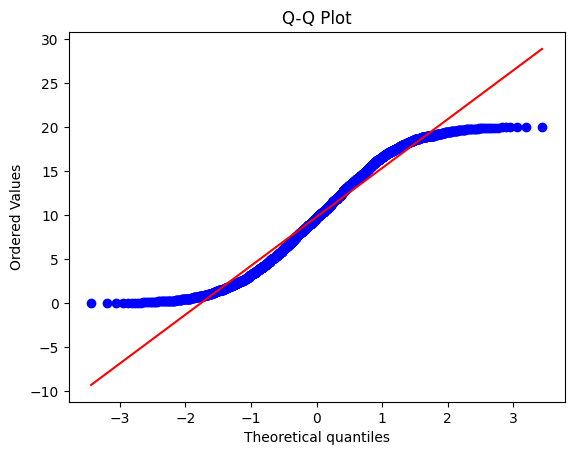

Shapiro-Wilk Test: Statistic = 0.9599900520664416, p-value = 3.593506032648797e-25
The data does NOT follow a normal distribution.
Kolmogorov-Smirnov Test (Normal): Statistic = 0.05509684780848123, p-value = 9.425383646044207e-07
Kolmogorov-Smirnov Test (Exponential): Statistic = 0.16028520149887487, p-value = 3.734896393846018e-54
Kolmogorov-Smirnov Test (Uniform): Statistic = 0.030485202628617092, p-value = 0.022967261233710172


In [62]:

from scipy.stats import norm, expon, uniform, shapiro, probplot
from scipy import stats
data = df['StudyTimeWeekly']
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Histogram')
plt.title("Data Distribution")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()

probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

shapiro_stat, shapiro_p = shapiro(data)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat}, p-value = {shapiro_p}")
if shapiro_p > 0.05:
    print("The data follows a normal distribution.")
else:
    print("The data does NOT follow a normal distribution.")

ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
print(f"Kolmogorov-Smirnov Test (Normal): Statistic = {ks_stat}, p-value = {ks_p}")

ks_stat, ks_p = stats.kstest(data, 'expon', args=(0, data.mean()))
print(f"Kolmogorov-Smirnov Test (Exponential): Statistic = {ks_stat}, p-value = {ks_p}")

ks_stat, ks_p = stats.kstest(data, 'uniform', args=(data.min(), data.max() - data.min()))
print(f"Kolmogorov-Smirnov Test (Uniform): Statistic = {ks_stat}, p-value = {ks_p}")

In [63]:
from scipy.stats import skew

skewness = skew(data)
print(f"Skewness: {skewness}")

if skewness > 0:
    print("(Right-Skewed).")
elif skewness < 0:
    print("  (Left-Skewed).")
else:
    print("  (Symmetric).")

Skewness: 0.050036669901331904
(Right-Skewed).


In [64]:
df.to_csv('cleaned_data.csv', index=False)

In [65]:
df.to_json('cleaned_data.json')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score